# SymPy - Symbolic algebra in Python

J.R. Johansson (jrjohansson at gmail.com)

The latest version of this [IPython notebook](http://ipython.org/notebook.html) lecture is available at [http://github.com/jrjohansson/scientific-python-lectures](http://github.com/jrjohansson/scientific-python-lectures).

The other notebooks in this lecture series are indexed at [http://jrjohansson.github.io](http://jrjohansson.github.io).

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

## Introduction

There are two notable Computer Algebra Systems (CAS) for Python:

* [SymPy](http://sympy.org/en/index.html) - A python module that can be used in any Python program, or in an IPython session, that provides powerful CAS features. 
* [Sage](http://www.sagemath.org/) - Sage is a full-featured and very powerful CAS environment that aims to provide an open source system that competes with Mathematica and Maple. Sage is not a regular Python module, but rather a CAS environment that uses Python as its programming language.

Sage is in some aspects more powerful than SymPy, but both offer very comprehensive CAS functionality. The advantage of SymPy is that it is a regular Python module and integrates well with the IPython notebook. 

In this lecture we will therefore look at how to use SymPy with IPython notebooks. If you are interested in an open source CAS environment I also recommend to read more about Sage.

To get started using SymPy in a Python program or notebook, import the module `sympy`:

In [2]:
from sympy import *

To get nice-looking $\LaTeX$ formatted output run:

In [3]:
init_printing()

# or with older versions of sympy/ipython, load the IPython extension
#%load_ext sympy.interactive.ipythonprinting
# or
#%load_ext sympyprinting

## Symbolic variables

In SymPy we need to create symbols for the variables we want to work with. We can create a new symbol using the `Symbol` class:

In [4]:
x = Symbol('x')

In [5]:
(pi + x)**2

In [6]:
# alternative way of defining symbols
a, b, c = symbols("a, b, c")

In [7]:
type(a)

sympy.core.symbol.Symbol

We can add assumptions to symbols when we create them:

In [8]:
x = Symbol('x', real=True)

In [9]:
x.is_imaginary

False

In [10]:
x = Symbol('x', positive=True)

In [11]:
x > 0

### Complex numbers

The imaginary unit is denoted `I` in SymPy. 

In [12]:
1+1*I

In [13]:
I**2

In [14]:
(x * I + 1)**2

### Rational numbers

There are three different numerical types in SymPy: `Real`, `Rational`, `Integer`: 

In [15]:
r1 = Rational(4,5)
r2 = Rational(5,4)

In [16]:
r1

In [17]:
r1+r2

In [18]:
r1/r2

## Numerical evaluation

SymPy uses a library for arbitrary precision as numerical backend, and has predefined SymPy expressions for a number of mathematical constants, such as: `pi`, `e`, `oo` for infinity.

To evaluate an expression numerically we can use the `evalf` function (or `N`). It takes an argument `n` which specifies the number of significant digits.

In [19]:
pi.evalf(n=50)

In [20]:
y = (x + pi)**2

In [21]:
N(y, 5) # same as evalf

When we numerically evaluate algebraic expressions we often want to substitute a symbol with a numerical value. In SymPy we do that using the `subs` function:

In [22]:
y.subs(x, 1.5)

In [23]:
N(y.subs(x, 1.5))

The `subs` function can of course also be used to substitute Symbols and expressions:

In [24]:
y.subs(x, a+pi)

We can also combine numerical evaluation of expressions with NumPy arrays:

In [25]:
import numpy

In [26]:
x_vec = numpy.arange(0, 10, 0.1)

In [27]:
y_vec = numpy.array([N(((x + pi)**2).subs(x, xx)) for xx in x_vec])

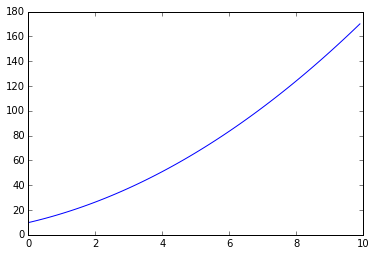

In [28]:
fig, ax = plt.subplots()
ax.plot(x_vec, y_vec);

However, this kind of numerical evaluation can be very slow, and there is a much more efficient way to do it: Use the function `lambdify` to "compile" a SymPy expression into a function that is much more efficient to evaluate numerically:

In [29]:
f = lambdify([x], (x + pi)**2, 'numpy')  # the first argument is a list of variables that
                                         # f will be a function of: in this case only x -> f(x)

In [30]:
y_vec = f(x_vec)  # now we can directly pass a numpy array and f(x) is efficiently evaluated

The speedup when using "lambdified" functions instead of direct numerical evaluation can be significant, often several orders of magnitude. Even in this simple example we get a significant speed up:

In [31]:
%%timeit

y_vec = numpy.array([N(((x + pi)**2).subs(x, xx)) for xx in x_vec])

10 loops, best of 3: 28.2 ms per loop


In [32]:
%%timeit

y_vec = f(x_vec)

The slowest run took 8.86 times longer than the fastest. This could mean that an intermediate result is being cached 
100000 loops, best of 3: 2.93 µs per loop


## Algebraic manipulations

One of the main uses of an CAS is to perform algebraic manipulations of expressions. For example, we might want to expand a product, factor an expression, or simplify an expression. The functions for doing these basic operations in SymPy are demonstrated in this section.

### Expand and factor

The first steps in an algebraic manipulation 

In [33]:
(x+1)*(x+2)*(x+3)

In [34]:
expand((x+1)*(x+2)*(x+3))

The `expand` function takes a number of keywords arguments which we can tell the functions what kind of expansions we want to have performed. For example, to expand trigonometric expressions, use the `trig=True` keyword argument:

In [35]:
sin(a+b)

In [36]:
expand(sin(a+b), trig=True)

See `help(expand)` for a detailed explanation of the various types of expansions the `expand` functions can perform.

The opposite of product expansion is of course factoring. To factor an expression in SymPy use the `factor` function: 

In [37]:
factor(x**3 + 6 * x**2 + 11*x + 6)

### Simplify

The `simplify` tries to simplify an expression into a nice looking expression, using various techniques. More specific alternatives to the `simplify` functions also exists: `trigsimp`, `powsimp`, `logcombine`, etc. 

The basic usages of these functions are as follows:

In [38]:
# simplify (sometimes) expands a product
simplify((x+1)*(x+2)*(x+3))

In [39]:
# simplify uses trigonometric identities
simplify(sin(a)**2 + cos(a)**2)

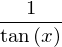

In [40]:
simplify(cos(x)/sin(x))

### apart and together

To manipulate symbolic expressions of fractions, we can use the `apart` and `together` functions:

In [41]:
f1 = 1/((a+1)*(a+2))

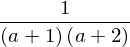

In [42]:
f1

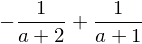

In [43]:
apart(f1)

In [44]:
f2 = 1/(a+2) + 1/(a+3)

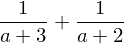

In [45]:
f2

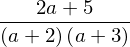

In [46]:
together(f2)

Simplify usually combines fractions but does not factor: 

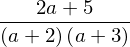

In [47]:
simplify(f2)

## Calculus

In addition to algebraic manipulations, the other main use of CAS is to do calculus, like derivatives and integrals of algebraic expressions.

### Differentiation

Differentiation is usually simple. Use the `diff` function. The first argument is the expression to take the derivative of, and the second argument is the symbol by which to take the derivative:

In [48]:
y

In [49]:
diff(y**2, x)

For higher order derivatives we can do:

In [50]:
diff(y**2, x, x)

In [51]:
diff(y**2, x, 2) # same as above

To calculate the derivative of a multivariate expression, we can do:

In [52]:
x, y, z = symbols("x,y,z")

In [53]:
f = sin(x*y) + cos(y*z)

$\frac{d^3f}{dxdy^2}$

In [54]:
diff(f, x, 1, y, 2)

## Integration

Integration is done in a similar fashion:

In [55]:
f

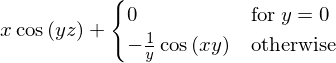

In [56]:
integrate(f, x)

By providing limits for the integration variable we can evaluate definite integrals:

In [57]:
integrate(f, (x, -1, 1))

and also improper integrals

In [58]:
integrate(exp(-x**2), (x, -oo, oo))

Remember, `oo` is the SymPy notation for inifinity.

### Sums and products

We can evaluate sums using the function `Sum`:

In [59]:
n = Symbol("n")

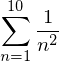

In [60]:
Sum(1/n**2, (n, 1, 10))

In [61]:
Sum(1/n**2, (n,1, 10)).evalf()

In [62]:
Sum(1/n**2, (n, 1, oo)).evalf()

Products work much the same way:

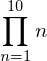

In [63]:
Product(n, (n, 1, 10)) # 10!

## Limits

Limits can be evaluated using the `limit` function. For example, 

In [64]:
limit(sin(x)/x, x, 0)

We can use 'limit' to check the result of derivation using the `diff` function:

In [65]:
f

In [66]:
diff(f, x)

$\displaystyle \frac{\mathrm{d}f(x,y)}{\mathrm{d}x} = \frac{f(x+h,y)-f(x,y)}{h}$

In [67]:
h = Symbol("h")

In [68]:
limit((f.subs(x, x+h) - f)/h, h, 0)

OK!

We can change the direction from which we approach the limiting point using the `dir` keyword argument:

In [69]:
limit(1/x, x, 0, dir="+")

In [70]:
limit(1/x, x, 0, dir="-")

## Series

Series expansion is also one of the most useful features of a CAS. In SymPy we can perform a series expansion of an expression using the `series` function:

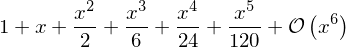

In [71]:
series(exp(x), x)

By default it expands the expression around $x=0$, but we can expand around any value of $x$ by explicitly include a value in the function call:

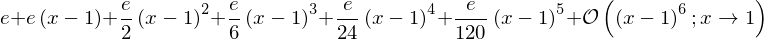

In [72]:
series(exp(x), x, 1)

And we can explicitly define to which order the series expansion should be carried out:

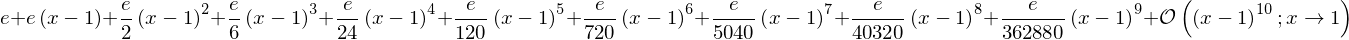

In [73]:
series(exp(x), x, 1, 10)

The series expansion includes the order of the approximation, which is very useful for keeping track of the order of validity when we do calculations with series expansions of different order:

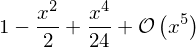

In [74]:
s1 = cos(x).series(x, 0, 5)
s1

In [75]:
s2 = sin(x).series(x, 0, 2)
s2

In [76]:
expand(s1 * s2)

If we want to get rid of the order information we can use the `removeO` method:

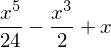

In [77]:
expand(s1.removeO() * s2.removeO())

But note that this is not the correct expansion of $\cos(x)\sin(x)$ to $5$th order:

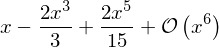

In [78]:
(cos(x)*sin(x)).series(x, 0, 6)

## Linear algebra

### Matrices

Matrices are defined using the `Matrix` class:

In [79]:
m11, m12, m21, m22 = symbols("m11, m12, m21, m22")
b1, b2 = symbols("b1, b2")

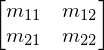

In [80]:
A = Matrix([[m11, m12],[m21, m22]])
A

In [81]:
b = Matrix([[b1], [b2]])
b

With `Matrix` class instances we can do the usual matrix algebra operations:

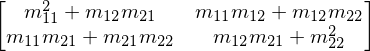

In [82]:
A**2

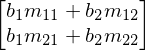

In [83]:
A * b

And calculate determinants and inverses, and the like:

In [84]:
A.det()

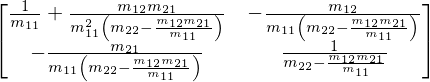

In [85]:
A.inv()

## Solving equations

For solving equations and systems of equations we can use the `solve` function:

In [86]:
solve(x**2 - 1, x)

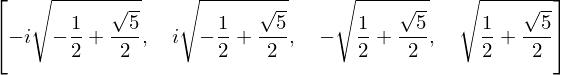

In [87]:
solve(x**4 - x**2 - 1, x)

System of equations:

In [88]:
solve([x + y - 1, x - y - 1], [x,y])

In terms of other symbolic expressions:

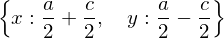

In [89]:
solve([x + y - a, x - y - c], [x,y])

## Further reading

* http://sympy.org/en/index.html - The SymPy projects web page.
* https://github.com/sympy/sympy - The source code of SymPy.
* http://live.sympy.org - Online version of SymPy for testing and demonstrations.

## Versions

In [90]:
%reload_ext version_information

%version_information numpy, matplotlib, sympy

Software versions
Python 2.7.10 64bit [GCC 4.2.1 (Apple Inc. build 5577)]
IPython 3.2.1
OS Darwin 14.1.0 x86_64 i386 64bit
numpy 1.9.2
matplotlib 1.4.3
sympy 0.7.6
Sat Aug 15 11:37:37 2015 JST